In [1]:
import time
import math
import numpy as np
import tensorly as tl
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from brokenaxes import brokenaxes
from online_tensor_decomposition import *

In [2]:
# for sample video
from cv2 import VideoWriter, VideoWriter_fourcc, imshow, imwrite

def make_video(tensor, filename, isColor=True):
    start = time.time()
    height = tensor.shape[1]
    width = tensor.shape[2]
    FPS = 24

    fourcc = VideoWriter_fourcc(*'MP42')
    video = VideoWriter(filename, fourcc, float(FPS), (width, height), isColor)

    for frame in tensor:
        video.write(np.uint8(frame))
    video.release()
    print('created', filename, time.time()-start)

In [ ]:
try:
    import cPickle as pickle
except ImportError:  # Python 3.x
    import pickle

In [49]:
# results = {}
# with open('results.p', 'rb') as fp:
#     results = pickle.load(fp)

In [78]:
with open('results.p', 'wb') as fp:
    pickle.dump(results, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [58]:
def plot_local(datasets, name, labelpad=50):
    def plot():
        points  = []
        for dataset in datasets:
            if dataset in results:
                for lib in libs:
                    if lib in results[dataset]:
                        point = [lib, dataset, [results[dataset][lib][3]], [results[dataset][lib][1]]]
                        points.append(point)


#         print(points)

        bax = brokenaxes(xscale='log')
#             bax = brokenaxes(xscale='log', subplot_spec=sps1)
        for point in points :
            lib, data, x, y = point
            if len(x) != 0:
                if x[0] != 0 and y[0] != 0:
                    bax.plot(x, y, label=lib,
                             c= dct[lib],  marker=dct1[data],
                            mfc='none', ms = 10, mew = 1.8)
#         bax.set_ylim([0.97,0.99])
#         bax.set_yscale('log') 
#         bax.set_xscale('log')


#         bax.tick_params(axis = 'y', labelsize =8)
        bax.set_ylabel('Average of Local Fitness', size = 10, labelpad=labelpad)
        bax.set_xlabel('Average of Local Running Time (s)', size = 10, labelpad=25)  ### Labelpad > space btw xaxis and xlabel
        plt.subplots_adjust(hspace=0.1, bottom = 0.4 , left = 0.23, top = 0.9) ### Plot to remove whitespace of plot 
#         plt.show()
#         plt.savefig(f'./plots/{name}_local.pdf',bbox_inches = 'tight', pad_inches = 0)
        plt.savefig(f'./plots/{name}_local.svg',bbox_inches = 'tight', pad_inches = 0)

    markers = ("o", "x", "s", "^", "4")
    colors = ('dodgerblue','mediumseagreen', 'hotpink', '#fba84a')

    libs = ("dao", "dtd", "ocp", 'fcp')
    f = lambda m,c: plt.plot([],[], color=c, marker = m,
                             mfc='none', ms = 10, mew = 1.8,
                                ls="none")[0]
    f2 = lambda c: plt.plot([],[],marker='.', color=c, )[0]

    dct = {}
    dct1 = {}

    for color, lib in zip(colors, libs):
        dct[lib] = color

    for data, marker in zip(datasets, markers):
        dct1[data] = marker
    
    fig = plt.figure(figsize = (4, 4), dpi = 150,)   ### figsize = (row, col), dpi > resolution(?)
#     sps1, sps2 = GridSpec(1,2)
    plot()

In [57]:
def plot_global(datasets, name, labelpad=50):
    def plot():
        points  = []
        for dataset in datasets:
            if dataset in results:
                for lib in libs:
                    if lib in results[dataset]:
                        point = [lib, dataset, [results[dataset][lib][2]], [results[dataset][lib][0]]]
                        points.append(point)
#         print(points)

        bax = brokenaxes(xscale='log')
#             bax = brokenaxes(xscale='log', subplot_spec=sps2)
        for point in points :
            lib, data, x, y = point
            if len(x) != 0:
                if x[0] != 0 and y[0] != 0:
                    bax.plot(x, y, label=lib,
                             c= dct[lib],  marker=dct1[data],
                            mfc='none', ms = 10, mew = 1.8)

#         bax.set_ylim([0.97,0.99])
#         bax.set_xscale('log') 
        bax.set_ylabel('Global Fitness', size = 10, labelpad=labelpad)
        bax.set_xlabel('Global Running Time (s)', size = 10, labelpad=25)  ### Labelpad > space btw xaxis and xlabel
        plt.subplots_adjust(hspace=0.1, bottom = 0.4 , left = 0.23, top = 0.9) ### Plot to remove whitespace of plot 
#         plt.show()
        plt.savefig(f'./plots/{name}_global.svg',bbox_inches = 'tight', pad_inches = 0)
#         plt.savefig(f'./plots/{name}_global.pdf',bbox_inches = 'tight', pad_inches = 0)

    markers = ("o", "x", "s", "^", "4")
    colors = ('dodgerblue','mediumseagreen', 'hotpink', '#fba84a')

    libs = ("dao", "dtd", "ocp", 'fcp')
    f = lambda m,c: plt.plot([],[], color=c, marker = m,
                             mfc='none', ms = 10, mew = 1.8,
                                ls="none")[0]
    f2 = lambda c: plt.plot([],[],marker='.', color=c, )[0]

    dct = {}
    dct1 = {}

    for color, lib in zip(colors, libs):
        dct[lib] = color

    for data, marker in zip(datasets, markers):
        dct1[data] = marker
    
    fig = plt.figure(figsize = (4, 4), dpi = 150,)   ### figsize = (row, col), dpi > resolution(?)
#     sps1, sps2 = GridSpec(1,2)
    plot()

In [6]:
def plot_mem(datasets, name):
    colors = ('dodgerblue','mediumseagreen', 'hotpink', '#fba84a')

    libs = ("dao", "dtd", "ocp", 'fcp')

    # create plot
    fig = plt.figure(figsize = (4, 4), dpi = 150,)
    index = np.arange(5)
    bar_width = 0.2

    for i, (color, lib) in enumerate(zip(colors, libs)):
        mem_list = [results[dataset][lib][4] for dataset in datasets]
        rects1 = plt.bar(index + bar_width*i, mem_list, bar_width, color=color, label=lib)

    plt.xlabel('Datasets')
    plt.ylabel('Memory Usage (byte)')
    plt.yscale('log')
    plt.xticks(index + bar_width*1.5, ('Synthetic', 'Video', 'Stock', 'Hall', 'Korea'))

    plt.savefig(f'./plots/{name}_mem.pdf', bbox_inches = 'tight', pad_inches = 0)
    

### Synthetic Data

In [7]:
import csv
synthetic_data = tl.tensor(np.zeros([1000, 10, 20, 30], dtype='f'))

for i in range(200):
    start = time.time()
    with open('../Data/synthetic_data/data_normal/data{}.tensor'.format(i)) as file:
        reader = csv.reader(file, delimiter='\t')    
        for row in reader:
            indices = [[index] for index in np.int64(np.asarray(row[:-1]))-1]
            synthetic_data[tuple(indices)] = np.double(row[-1])
    print('>> synthetic_data{} loaded '.format(i), time.time() - start)

>> synthetic_data0 loaded  0.8391540050506592
>> synthetic_data1 loaded  0.6161336898803711
>> synthetic_data2 loaded  0.7087507247924805
>> synthetic_data3 loaded  0.6797199249267578
>> synthetic_data4 loaded  0.6568729877471924
>> synthetic_data5 loaded  0.6261856555938721
>> synthetic_data6 loaded  0.708629846572876
>> synthetic_data7 loaded  0.6330685615539551
>> synthetic_data8 loaded  0.6434533596038818
>> synthetic_data9 loaded  0.8378775119781494
>> synthetic_data10 loaded  0.8757109642028809
>> synthetic_data11 loaded  0.7717041969299316
>> synthetic_data12 loaded  0.7455718517303467
>> synthetic_data13 loaded  0.689828634262085
>> synthetic_data14 loaded  0.6643569469451904
>> synthetic_data15 loaded  0.6472103595733643
>> synthetic_data16 loaded  0.6506061553955078
>> synthetic_data17 loaded  0.6511194705963135
>> synthetic_data18 loaded  0.6635842323303223
>> synthetic_data19 loaded  0.6428968906402588
>> synthetic_data20 loaded  0.6617836952209473
>> synthetic_data21 loade

### Sample Video

In [8]:
import csv
sample_video = tl.tensor(np.zeros([205, 240, 320, 3], dtype='d'))

for i in range(41):
    start = time.time()
    with open('../Data/sample_video/data/video{}.tensor'.format(i)) as file:
        reader = csv.reader(file, delimiter='\t')    
        for row in reader:
            indices = [[index] for index in np.int64(np.asarray(row[:-1]))-1]
            sample_video[tuple(indices)] = np.double(row[-1])
    print('>> sample_video{} loaded '.format(i), time.time() - start)

>> sample_video0 loaded  23.390759229660034
>> sample_video1 loaded  24.1960391998291
>> sample_video2 loaded  22.8388409614563
>> sample_video3 loaded  23.77741837501526
>> sample_video4 loaded  24.217160940170288
>> sample_video5 loaded  24.049925327301025
>> sample_video6 loaded  24.605818510055542
>> sample_video7 loaded  23.80730962753296
>> sample_video8 loaded  23.852193355560303
>> sample_video9 loaded  23.456214427947998
>> sample_video10 loaded  23.901246309280396
>> sample_video11 loaded  24.53081178665161
>> sample_video12 loaded  23.808432817459106
>> sample_video13 loaded  24.105808973312378
>> sample_video14 loaded  23.234720706939697
>> sample_video15 loaded  23.977659463882446
>> sample_video16 loaded  23.366034984588623
>> sample_video17 loaded  23.319368839263916
>> sample_video18 loaded  23.293186902999878
>> sample_video19 loaded  23.047711849212646
>> sample_video20 loaded  23.106650590896606
>> sample_video21 loaded  23.025676250457764
>> sample_video22 loaded  2

### Stock

In [9]:
import csv

stock2_tensor = tl.tensor(np.zeros([3089, 140, 5], dtype='d'))
start = time.time()
with open('../Data/stock/KOSPI140.tensor') as file:
    reader = csv.reader(file, delimiter='\t')    
    for row in reader:
        indices = np.asarray([index for index in np.int64(np.asarray(row[:-1]))])[[1, 0, 2]]
        stock2_tensor[tuple(indices)] = np.double(row[-1])
print('>> stock2_tensor loaded ', time.time() - start)

>> stock2_tensor loaded  30.79747247695923


### Hall from OLSTEC
* `hall1-200.mat`: 144 * 176 * 200 => 200 * 144 * 176
* `hall_144x100_frame2900-3899_pan.mat`: 144 * 100 * 1000 => 1000 * 144 * 100

In [10]:
from scipy.io import loadmat
import h5py

hall1 = loadmat('../Data/hall/hall1-200.mat')['XO']
hall1 = np.moveaxis(hall1, -1, 0)
hall1 = hall1.reshape(200, 144, 176, order='F')

with h5py.File('../Data/hall/hall_144x100_frame2900-3899_pan.mat', 'r') as f:
    hall2 = np.array(f['X0'])
    hall2 = hall2.reshape(1000, 144, 100, order='F')
    
hall1_tensor = tl.tensor(hall1, dtype='f')
hall2_tensor = tl.tensor(hall2, dtype='f')
print(hall1_tensor.shape, hall2_tensor.shape)
# make_video(hall1, 'hall1.avi', False)
# make_video(hall2, 'hall2.avi', False)

(200, 144, 176) (1000, 144, 100)


### Air Quality Tensor
* `<date> <location> <air pollutants> (measurement)`
* Beijing Air Quality
  * 2,454,305 out of 2,524,536 (35,063 * 12 * 6)
* Korea Air Quality
  * 11,270,028 out of 18,368,364 (9,478 * 323 * 6)
* Madrid Air Quality
  * 8,036,759 out of 21,587,328 (64,248 * 24 * 14)

In [11]:
# beijing_df = pd.read_csv('../../Data/air_quality/BeijingAirQuality/beijing.tensor', delimiter='\t', header=None)
korea_df = pd.read_csv('../../Data/air_quality/KoreaAirQuality/korea_airquality.tensor', delimiter='\t', header=None)
# madrid_df = pd.read_csv('../../Data/air_quality/MadridAirQuality/1hour_madrid.tensor', delimiter='\t', header=None)

In [12]:
def get_tensor(df):
    start = time.time()

    dims = df[[0,1,2]].max()+1
    tensor = np.empty(dims) * np.nan
    tensor.shape

    for i, row in df.iterrows():
        indices = [[index] for index in np.int64(np.asarray(row[:-1]))]
        tensor[tuple(indices)] = np.double(row[3])

    avg = []
    for i in range(tensor.shape[2]):
        avg.append(np.nanmean(tensor[:,:,i]))
    inds = np.where(np.isnan(tensor))
    for ind in zip(inds[0], inds[1], inds[2]):
        tensor[ind] = avg[ind[-1]]
        
    print(time.time() - start)
    return tensor

In [13]:
# beijing_tensor = get_tensor(beijing_df)
korea_tensor = get_tensor(korea_df)
# madrid_tensor = get_tensor(madrid_df)

1357.6915867328644


---
# Experiment #1

In [14]:
# synthetic
(n_iter, ul, ll) = (1, 1.2, 1.1)
tensor_stream = create_tensor_stream(synthetic_data, start_to_stream=10, batch_sizes=np.full((99), 10, dtype=int))
#results['synthetic-10'] = online_tensor_decomposition('synthetic', synthetic_data, tensor_stream, rank=10, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['synthetic-20'] = online_tensor_decomposition('synthetic', synthetic_data, tensor_stream, rank=20, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['synthetic-30'] = online_tensor_decomposition('synthetic', synthetic_data, tensor_stream, rank=30, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['synthetic-40'] = online_tensor_decomposition('synthetic', synthetic_data, tensor_stream, rank=40, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
#results['synthetic-50'] = online_tensor_decomposition('synthetic', synthetic_data, tensor_stream, rank=50, n_iter=n_iter, ul=ul, ll=ll, verbose=False)

-----------------------------------
making init decomposition result: 1.3715648651123047

 >> dao rank-20 n_iter-1
||A-B||: 194476.7209946115
split: 4 refine: 0
global fitness 0.20817354935653942
local fitness 0.2080435783487119
global running time 10.587720394134521
local running time 0.022218229794743086
memory usage 496

 >> dtd rank-20 n_iter-1
||A-B||: 235096.0768926834
global fitness 0.042788817221504294
local fitness 0.04409893402026066
global running time 4.002120494842529
local running time 0.02469032220166139
memory usage 464

 >> ocp rank-20 n_iter-1
||A-B||: 235113.0252334409
global fitness 0.042719810790103896
local fitness 0.04410090724577709
global running time 2.042881488800049
local running time 0.004635928857206094
memory usage 4160

 >> fcp rank-20 n_iter-1
global fitness 0.0786055688210392
global running time 21.169644832611084
memory usage 24000248
-----------------------------------
making init decomposition result: 2.0121047496795654

 >> dao rank-30 n_iter-1
||A

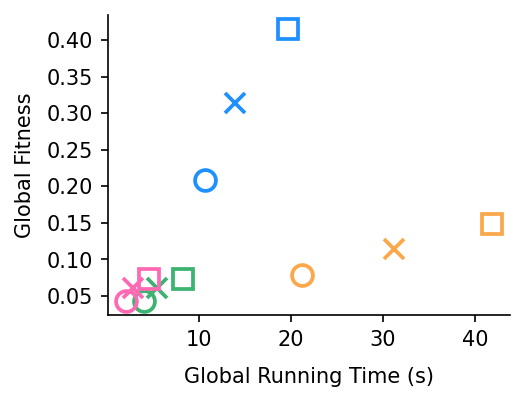

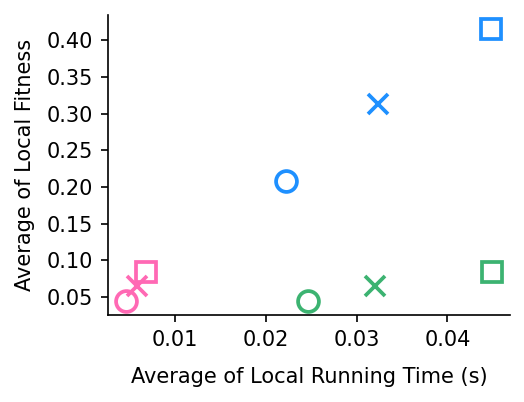

In [63]:
datasets = ('synthetic-20', 'synthetic-30', 'synthetic-40')
plot_global(datasets, 'E1_synthetic', 35)
plot_local(datasets, 'E1_synthetic', 35)

In [16]:
# video
(n_iter, ul, ll) = (1, 6, 2)
tensor_stream = create_tensor_stream(sample_video, start_to_stream=5, batch_sizes=np.full((40), 5, dtype=int))
#results['video-10'] = online_tensor_decomposition('video', sample_video, tensor_stream, rank=10, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['video-20'] = online_tensor_decomposition('video', sample_video, tensor_stream, rank=20, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['video-30'] = online_tensor_decomposition('video', sample_video, tensor_stream, rank=30, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['video-40'] = online_tensor_decomposition('video', sample_video, tensor_stream, rank=40, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
#results['video-50'] = online_tensor_decomposition('video', sample_video, tensor_stream, rank=50, n_iter=n_iter, ul=ul, ll=ll, verbose=False)

-----------------------------------
making init decomposition result: 13.250207901000977

 >> dao rank-20 n_iter-1
||A-B||: 121393.95985183511
split: 3 refine: 9
global fitness 0.863999653248503
local fitness 0.8671028704410765
global running time 70.34676384925842
local running time 0.34174715280532836
memory usage 552

 >> dtd rank-20 n_iter-1
||A-B||: 171021.0207889936
global fitness 0.8084013557388992
local fitness 0.8054599646308171
global running time 29.753263473510742
local running time 0.24012625813484192
memory usage 464

 >> ocp rank-20 n_iter-1
||A-B||: 187806.5912655946
global fitness 0.7895961086901523
local fitness 0.8140519511563333
global running time 32.81720471382141
local running time 0.31735997200012206
memory usage 4160

 >> fcp rank-20 n_iter-1
global fitness 0.8467148432821575
global running time 687.0275135040283
memory usage 377856248
-----------------------------------
making init decomposition result: 19.676806926727295

 >> dao rank-30 n_iter-1
||A-B||: 111

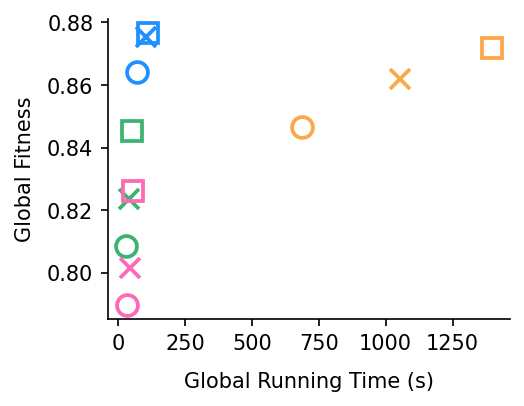

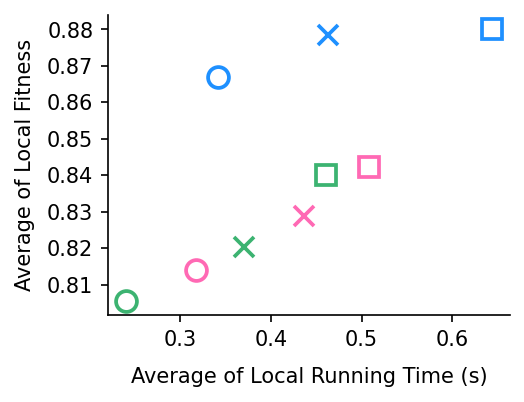

In [64]:
datasets = ('video-20', 'video-30', 'video-40')
plot_global(datasets, 'E1_video', 35)
plot_local(datasets, 'E1_video', 35)

In [73]:
# stock
(n_iter, ul, ll) = (1, 6, 5)
tensor_stream = create_tensor_stream(stock2_tensor, start_to_stream=5, batch_sizes=np.full((1028), 3, dtype=int))
#results['stock-10'] = online_tensor_decomposition('stock', stock2_tensor, tensor_stream, rank=10, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
# results['stock-15'] = online_tensor_decomposition('stock', stock2_tensor, tensor_stream, rank=15, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['stock-21'] = online_tensor_decomposition('stock', stock2_tensor, tensor_stream, rank=21, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
# results['stock-22'] = online_tensor_decomposition('stock', stock2_tensor, tensor_stream, rank=22, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
# results['stock-20'] = online_tensor_decomposition('stock', stock2_tensor, tensor_stream, rank=20, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
# results['stock-25'] = online_tensor_decomposition('stock', stock2_tensor, tensor_stream, rank=25, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
#results['stock-30'] = online_tensor_decomposition('stock', stock2_tensor, tensor_stream, rank=30, n_iter=n_iter, ul=ul, ll=ll, verbose=False)

-----------------------------------
making init decomposition result: 0.8508005142211914

 >> dao rank-21 n_iter-1
||A-B||: 29.634892949252002
split: 23 refine: 1
global fitness 0.9774817786808904
local fitness 0.9712644101971586
global running time 12.969017028808594
local running time 0.007500100924347161
memory usage 672

 >> dtd rank-21 n_iter-1
||A-B||: 30.305656517197793
global fitness 0.9769720956359182
local fitness 0.9702534038576681
global running time 10.338857889175415
local running time 0.007998540011825265
memory usage 424

 >> ocp rank-21 n_iter-1
||A-B||: 30.665941378301614
global fitness 0.9766983313859797
local fitness 0.9703060753647527
global running time 3.627854824066162
local running time 0.0015419264711758506
memory usage 4424

 >> fcp rank-21 n_iter-1
global fitness 0.978037687264582
global running time 46.94638538360596
memory usage 8416


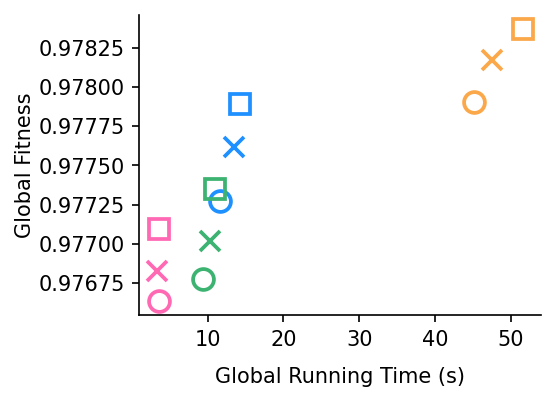

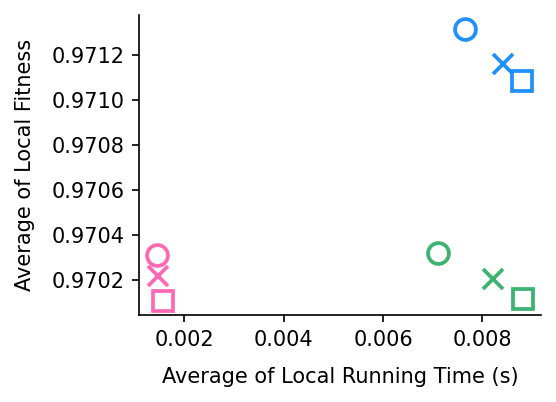

In [75]:
datasets = ('stock-20', 'stock-22', 'stock-24')
plot_global(datasets, 'E1_stock', 50)
plot_local(datasets, 'E1_stock', 50)

In [35]:
# hall
(n_iter, ul, ll) = (1, 0.5, 0.1)
tensor_stream = create_tensor_stream(hall1_tensor, start_to_stream=10, batch_sizes=np.full((19), 10, dtype=int))
# results['hall-10'] = online_tensor_decomposition('hall', hall1_tensor, tensor_stream, rank=15, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
# results['hall-15'] = online_tensor_decomposition('hall', hall1_tensor, tensor_stream, rank=20, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
# results['hall-20'] = online_tensor_decomposition('hall', hall1_tensor, tensor_stream, rank=20, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
# results['hall-25'] = online_tensor_decomposition('hall', hall1_tensor, tensor_stream, rank=25, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['hall-30'] = online_tensor_decomposition('hall', hall1_tensor, tensor_stream, rank=30, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
#results['hall-35'] = online_tensor_decomposition('hall', hall1_tensor, tensor_stream, rank=35, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
#results['hall-40'] = online_tensor_decomposition('hall', hall1_tensor, tensor_stream, rank=40, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
#results['hall-45'] = online_tensor_decomposition('hall', hall1_tensor, tensor_stream, rank=45, n_iter=n_iter, ul=ul, ll=ll, verbose=False)

-----------------------------------
making init decomposition result: 1.8983538150787354

 >> dao rank-30 n_iter-1
||A-B||: 32973.20825948915
split: 12 refine: 4
global fitness 0.9067958242133392
local fitness 0.9126439802199277
global running time 26.66174292564392
local running time 0.04299156289351614
memory usage 600

 >> dtd rank-30 n_iter-1
||A-B||: 44267.88570201298
global fitness 0.8748695677956407
local fitness 0.8756087004695683
global running time 3.214475393295288
local running time 0.06543756786145662
memory usage 424

 >> ocp rank-30 n_iter-1
||A-B||: 45450.87753193936
global fitness 0.8715256475558226
local fitness 0.8783506215446412
global running time 2.1420528888702393
local running time 0.010711883243761565
memory usage 8096

 >> fcp rank-30 n_iter-1
global fitness 0.8918749064312748
global running time 48.67425489425659
memory usage 20275432


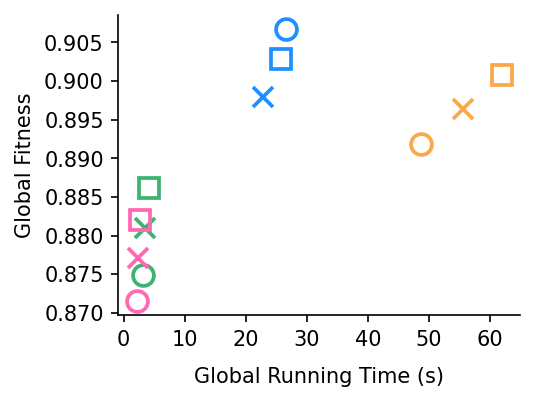

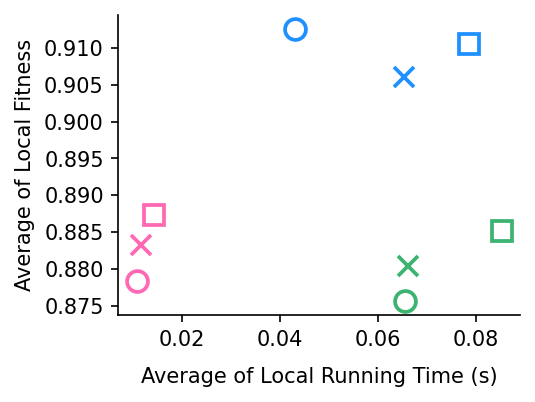

In [81]:
datasets = ('hall-30', 'hall-35', 'hall-40')
plot_global(datasets, 'E1_hall', 40)
plot_local(datasets, 'E1_hall', 40)

In [ ]:
# korea air-quality
(n_iter, ul, ll) = (1, 2, 1.3)
tensor_stream = create_tensor_stream(korea_tensor, start_to_stream=79, batch_sizes=np.full((94), 100, dtype=int))
#results['korea-10'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=10, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
#results['korea-15'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=15, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
#results['korea-20'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=20, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
#results['korea-25'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=25, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['korea-30'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=30, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['korea-40'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=40, n_iter=n_iter, ul=ul, ll=ll, verbose=False)
results['korea-50'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=50, n_iter=n_iter, ul=ul, ll=ll, verbose=False)

/home/lucetre/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


-----------------------------------
making init decomposition result: 3.813258647918701

 >> dao rank-30 n_iter-1
||A-B||: 11102.210916142632
split: 56 refine: 2
global fitness 0.8881300592719832
local fitness 0.8893204404102149
global running time 243.78721928596497
local running time 0.022648778367549815
memory usage 936

 >> dtd rank-30 n_iter-1
||A-B||: 18056.346578376517
global fitness 0.8180576430456314
local fitness 0.8128037814712495
global running time 14.92306137084961
local running time 0.05142631175670218
memory usage 424

 >> ocp rank-30 n_iter-1
||A-B||: 18292.418341683326
global fitness 0.8156788975535698
local fitness 0.8110112398587952
global running time 11.58374285697937
local running time 0.014378060685827377
memory usage 8096

 >> fcp rank-30 n_iter-1


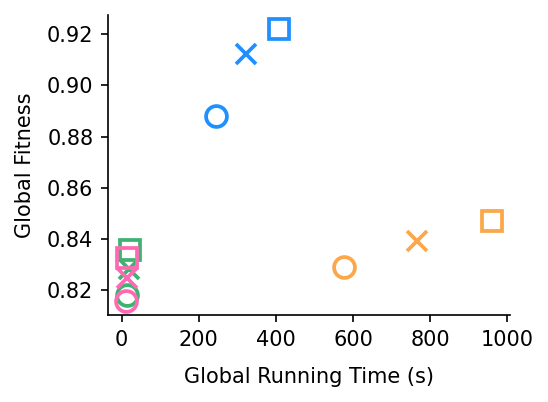

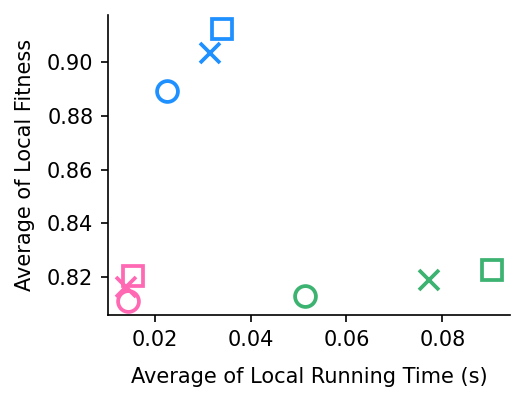

In [82]:
datasets = ('korea-30', 'korea-40', 'korea-50')
plot_global(datasets, 'E1_korea', 35)
plot_local(datasets, 'E1_korea', 35)

---
# Experiment #2

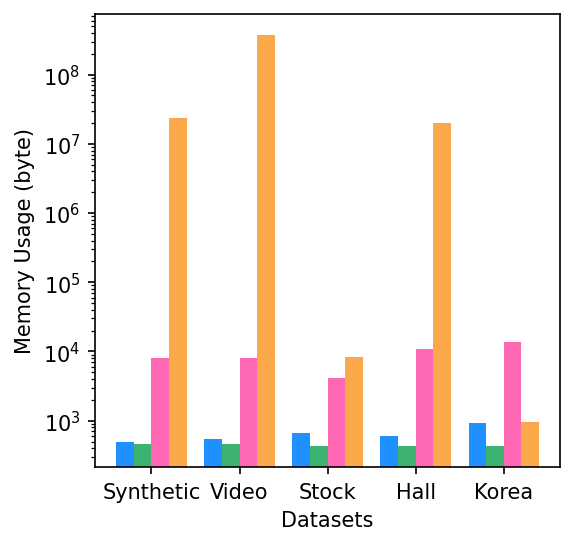

In [52]:
plot_mem(('synthetic-30', 'video-30', 'stock-20', 'hall-35', 'korea-40'), 'E2')

---
# Experiment #5

In [ ]:
def plot_E5(dataset):
    verbose_list = results[dataset]['dao'][5]
    split_points, refine_points = results[dataset]['dao'][6]
    color = 'tab:red'
    
    fig, ax1 = plt.subplots()
    #         plt.xticks(rotation=45)
    ax1.set_ylabel('Local Error Norm', color=color, fontsize=12)
    ax1.set_xlabel('# of Income Slices', fontsize=12)
    #         ax1.xaxis.set_label_position('top')
    
    for p in refine_points:
        ax1.axvline(p,  label='line: {}'.format(p), c='lightgray', linewidth=2, linestyle='--')
    for p in split_points:
        ax1.axvline(p,  label='line: {}'.format(p), c='lightgray', linewidth=2, linestyle='-')
    
    ax1.plot(verbose_list[:,0], verbose_list[:,2], linewidth=1, marker="2", color=color)
    
    color = 'tab:blue'
    ax2 = ax1.twinx()
    ax2.set_ylabel('Local Running Time (s)', color=color,  rotation=270, fontsize=12, labelpad=15)
    ax2.plot(verbose_list[:,0], verbose_list[:,1], linewidth=0.5, marker="2", color=color)
    fig.tight_layout()

    plt.savefig('plots/E5_{}.pdf'.format(dataset), bbox_inches='tight', pad_inches=0)

In [ ]:
def plot_E5_error(dataset):
    
    markers = ("+", "x", "1")
    colors = ('dodgerblue','mediumseagreen', 'hotpink')
    libs = ("dao", "dtd", "ocp")
    fig = plt.figure(figsize = (4, 4), dpi = 150,) 
    fig, ax1 = plt.subplots()
    ax1.set_ylabel('Local Error Norm', fontsize=12)
    ax1.set_xlabel('Number of Incomed Slices', fontsize=12)
    #         ax1.xaxis.set_label_position('top')
    
    
    split_points, refine_points = results[dataset]['dao'][6]
    for p in refine_points:
        ax1.axvline(p,  label='line: {}'.format(p), c='lightgray', linewidth=2, linestyle='--')
    for p in split_points:
        ax1.axvline(p,  label='line: {}'.format(p), c='lightgray', linewidth=2, linestyle='-')
    
    for color, marker, lib in zip(colors, markers, libs):
        verbose_list = results[dataset][lib][5]
        ax1.plot(verbose_list[:,0], verbose_list[:,2], linewidth=1, marker=marker, color=color)
    plt.savefig('plots/E5_{}_error.pdf'.format(dataset), bbox_inches='tight', pad_inches=0)

def plot_E5_rt(dataset):
    markers = ("+", "x", "1")
    colors = ('dodgerblue','mediumseagreen', 'hotpink')
    libs = ("dao", "dtd", "ocp")
    fig = plt.figure(figsize = (4, 4), dpi = 150,) 
    fig, ax1 = plt.subplots()
    ¶
    ax1.set_yscale('log')
    ax1.set_ylabel('Local Running Time', fontsize=12)
    ax1.set_xlabel('Number of Incomed Slices', fontsize=12)
    #         ax1.xaxis.set_label_position('top')
    
    
    split_points, refine_points = results[dataset]['dao'][6]
    for p in refine_points:
        ax1.axvline(p,  label='line: {}'.format(p), c='lightgray', linewidth=2, linestyle='--')
    for p in split_points:
        ax1.axvline(p,  label='line: {}'.format(p), c='lightgray', linewidth=2, linestyle='-')
    
    for color, marker, lib in zip(colors, markers, libs):
        verbose_list = results[dataset][lib][5]
        ax1.plot(verbose_list[:,0], verbose_list[:,1], linewidth=1, marker=marker, color=color)
        plt.savefig('plots/E5_{}_rt.pdf'.format(dataset), bbox_inches='tight', pad_inches=0)


In [ ]:
# plot_E5_error('video-30')
# plot_E5_rt('video-30')
for dataset in ('video-30', 'stock-20', 'hall-20', 'korea-20'):
    plot_E5_error(dataset)
    plot_E5_rt(dataset)

---
# Experiment #3

In [ ]:
results['korea--'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=20, methods=['dao'], n_iter=n_iter, ul=-1, ll=-1, verbose=False)

In [ ]:
# korea air-quality
tensor_stream = create_tensor_stream(korea_tensor, start_to_stream=79, batch_sizes=np.full((94), 100, dtype=int))
results['korea-split-1.0'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=20, methods=['dao'], n_iter=n_iter, ul=1.0, ll=-1, verbose=False) # 65
results['korea-split-1.2'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=20, methods=['dao'], n_iter=n_iter, ul=1.2, ll=-1, verbose=False) # 57
results['korea-split-1.4'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=20, methods=['dao'], n_iter=n_iter, ul=1.4, ll=-1, verbose=False) # 45
results['korea-split-1.6'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=20, methods=['dao'], n_iter=n_iter, ul=1.6, ll=-1, verbose=False) # 36
results['korea-split-1.8'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=20, methods=['dao'], n_iter=n_iter, ul=1.8, ll=-1, verbose=False) # 5

In [ ]:
# korea air-quality
tensor_stream = create_tensor_stream(korea_tensor, start_to_stream=79, batch_sizes=np.full((94), 100, dtype=int))
results['korea-refine-1.4'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=20, methods=['dao'], n_iter=n_iter, ul=-1, ll=1.4, verbose=False) # 15
results['korea-refine-1.6'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=20, methods=['dao'], n_iter=n_iter, ul=-1, ll=1.6, verbose=False) # 14
results['korea-refine-1.8'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=20, methods=['dao'], n_iter=n_iter, ul=-1, ll=1.8, verbose=False) # 12
results['korea-refine-2.0'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=20, methods=['dao'], n_iter=n_iter, ul=-1, ll=2.0, verbose=False) # 8
results['korea-refine-2.2'] = online_tensor_decomposition('korea', korea_tensor, tensor_stream, rank=20, methods=['dao'], n_iter=n_iter, ul=-1, ll=2.2, verbose=False) # 6

In [ ]:
for dataset in ('korea-split-1.0', 'korea-split-1.2', 'korea-split-1.4', 'korea-split-1.6', 'korea-split-1.8'):
    plot_E5(dataset)
for dataset in ('korea-refine-1.4', 'korea-refine-1.6', 'korea-refine-1.8', 'korea-refine-2.0', 'korea-refine-2.2'):
    plot_E5(dataset)

In [ ]:
rows = []
for dataset in ('korea-split-1.0', 'korea-split-1.2', 'korea-split-1.4', 'korea-split-1.6', 'korea-split-1.8'):
    row = dataset.split('-')
    row.append('-')
    verbose_list = results[dataset]['dao'][5]
    split_points, refine_points = results[dataset]['dao'][6]
    row.append(len(split_points))
    row += results[dataset]['dao'][:5]
    rows.append(row)
    
for dataset in ('korea-refine-1.4', 'korea-refine-1.6', 'korea-refine-1.8', 'korea-refine-2.0', 'korea-refine-2.2'):
    row = dataset.split('-')[:-1]
    row.append('-')
    row.append(dataset.split('-')[-1])
    verbose_list = results[dataset]['dao'][5]
    split_points, refine_points = results[dataset]['dao'][6]
    row.append(len(refine_points))
    row += results[dataset]['dao'][:5]
    rows.append(row)
    
dataset = 'korea--'
row = dataset.split('-')[:1]
row += ['-'] * 3
verbose_list = results[dataset]['dao'][5]
split_points, refine_points = results[dataset]['dao'][6]
row.append(len(refine_points))
row += results[dataset]['dao'][:5]
rows.append(row)
    
df = pd.DataFrame(rows, columns=['dataset', 'process', 'ul', 'll', 'points-#', 'global-fit', 'local-fit', 'global-rt', 'local-rt', 'mem'])
df

---
# Experiment #4

In [ ]:
# hall
(n_iter, ul, ll) = (1, 0.5, 0.1)
tensor_stream = create_tensor_stream(hall1_tensor, start_to_stream=10, batch_sizes=np.full((19), 10, dtype=int))
results['hall'] = online_tensor_decomposition('hall', hall1_tensor, tensor_stream, rank=100, n_iter=n_iter, ul=ul, ll=ll, verbose=False)

In [ ]:
frame = results['hall']['dao'][6][0][10]*10
for lib in ("dao", "dtd", "ocp", 'fcp'):
    make_video(results['hall'][lib][-1], f'plots/E4-hall-{lib}.avi', False)
    imwrite(f'plots/E4-hall-{lib}-{frame}.jpg', results['hall'][lib][-1][frame])
make_video(hall1_tensor, 'plots/E4-hall-org.avi', False)
imwrite(f'plots/E4-hall-org-{frame}.jpg', hall1_tensor[frame])

In [ ]:
# video
(n_iter, ul, ll) = (1, 6, 2)
tensor_stream = create_tensor_stream(sample_video, start_to_stream=5, batch_sizes=np.full((40), 5, dtype=int))
results['video'] = online_tensor_decomposition('video', sample_video, tensor_stream, rank=100, n_iter=n_iter, ul=ul, ll=ll, verbose=False)

In [ ]:
frame = results['video']['dao'][6][0][0]*5
for lib in ("dao", "dtd", "ocp", 'fcp'):
    make_video(results['video'][lib][-1], f'plots/E4-video-{lib}.avi')
    imwrite(f'plots/E4-video-{lib}-{frame}.jpg', results['video'][lib][-1][frame])
make_video(sample_video, 'plots/E4-video-org.avi')
imwrite(f'plots/E4-video-org-{frame}.jpg', sample_video[frame])

---
## batch size

In [ ]:
(n_iter, ul, ll) = (1, 2, 1.3)
tensor_stream = create_tensor_stream(korea_tensor, start_to_stream=-5)
tensor_stream = create_tensor_stream(korea_tensor, start_to_stream=-10)
tensor_stream = create_tensor_stream(korea_tensor, start_to_stream=-50)
# tensor_stream = create_tensor_stream(korea_tensor, start_to_stream=-100)